<a href="https://colab.research.google.com/github/jeetshah0303/Artificialintelligence/blob/main/PADlab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

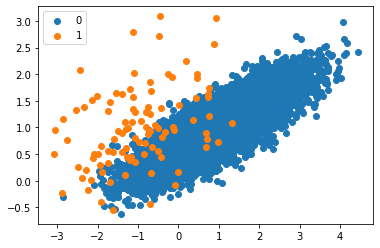

In [ ]:
# Define the Dataset
x, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99],
                           flip_y=0, random_state=1)

# Summarize the Class Distribution
counter = Counter(y)
# print(counter)

# Scatter plot of samples by Label
for label, _ in counter.items():
    rowIX = where(y == label)[0]
    pyplot.scatter(x[rowIX, 0], x[rowIX, 1], label = str(label))

pyplot.legend()
pyplot.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 9900, 1: 100})


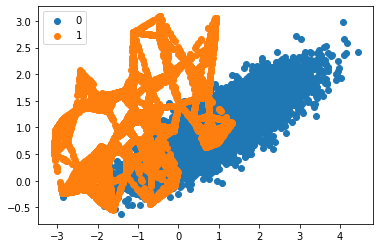

[ 207  649  843 1017 1098 1155 1306 1308 1325 1374 1561 1583 1632 1720
 1811 1813 1890 1962 1963 2034 2061 2093 2115 2138 2312 2362 2475 2703
 2713 2961 3060 3170 3196 3309 3407 3562 3598 3600 3708 3812 3911 4047
 4122 4130 4189 4571 4587 4650 5017 5116 5244 5297 5357 5444 5451 5612
 5783 5912 5917 5988 6021 6111 6120 6253 6387 6502 6591 6695 6829 7011
 7168 7251 7329 7336 7356 7360 7392 7468 7584 7668 7984 8168 8322 8378
 8405 8429 8499 8554 8668 8720 8859 9005 9048 9092 9093 9160 9498 9613
 9803 9909]


In [ ]:
# Oversampling of Dataset using SMOTE
# Transform the Dataset

oversample = SMOTE()

# Summarize the Class Distribution
x1, y1 = oversample.fit_resample(x, y)
counter1 = Counter(y1)
print(counter)

# Scatter plot of samples by Label
for label, _ in counter.items():
    rowIX1 = where(y1 == label)[0]
    pyplot.scatter(x1[rowIX1, 0], x1[rowIX1, 1], label = str(label))

pyplot.legend()
pyplot.show()
print(rowIX)

In [ ]:
counter1 = Counter(y1)
print(counter)


Counter({0: 9900, 1: 100})


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
#oversample with SMOTE and randomly undersample so that the overlap reduces 
over=SMOTE(sampling_strategy=0.2)
#makes minority class 0.1% of majority class
under=RandomUnderSampler(sampling_strategy=0.5) #reducing the number of samples of the majority class 
#a=0.5, majority class samples after resampling = minority samples/0.5
step=[('o',over),('u',under)]
pipeline = Pipeline(steps=step)
#transforming the dataset 
x2,y2=pipeline.fit_resample(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


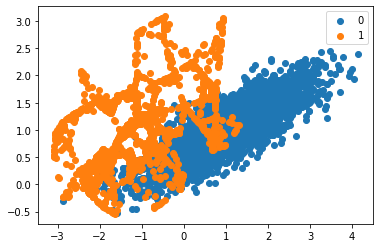

In [ ]:
for label, _ in counter.items():
  row_ix2 = where(y2==label)[0]
  pyplot.scatter(x2[row_ix2,0],x2[row_ix2,1],label=str(label))
pyplot.legend()
pyplot.show()

In [ ]:
#application of decision trees on the dataset 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean 
model=DecisionTreeClassifier()
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
scores=cross_val_score(model,x,y,scoring='roc_auc')
print('MEAN ROC AUC: %3f' %mean(scores))

MEAN ROC AUC: 0.767677


In [ ]:
#decision tree on the second dataset (oversampled)
scores1=cross_val_score(model,x1,y1,scoring='roc_auc')
print('MEAN ROC AUC: %3f' %mean(scores1)) 

MEAN ROC AUC: 0.937626


In [ ]:

scores1=cross_val_score(model,x2,y2,scoring='roc_auc')
print('MEAN ROC AUC: %3f' %mean(scores1)) 

MEAN ROC AUC: 0.930303
